# Simulation 01a

# Using Stan for simulation

## Josep Fortiana  2023-02-27

***
###### LaTeX macros
$\def\prob{P}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\DeclareMathOperator{\indep}{\perp\negthickspace\negthinspace\perp}$
***

# Structure of a Stan program

Stan is a _probabilistic programming language,_ meaning  **it has probability distributions as primary objects**.

### Stan programs

Programs in Stan are ASCII text files.

Either standalone files which usually have the `.stan` extension

Or just as string objects in the calling environment (R or Python code or notebooks) directly sent to the interpreter as shown below.

### Blocks in a Stan program

Stan programs are organized in blocks. 

The following description is taken from _Stan Reference manual 2.29_:

```
functions {
// ... function declarations and definitions ...
}
data {
// ... declarations ...
}
transformed data {
// ... declarations ... statements ...
}
parameters {
// ... declarations ...
}
transformed parameters {
// ... declarations ... statements ...
}
model {
// ... declarations ... statements ...
}
generated quantities {
// ... declarations ... statements ...
}

```

The function-definition block `functions` contains user-defined functions.

The `data` block declares the required data for the model. 

The `transformed data` block allows the definition of constants and transforms of the data. 

The `parameters` block declares the model's parameters — the unconstrained version of the parameters is what's sampled or optimized. 

The `transformed parameters` block allows variables to be defined in terms of data and parameters that may be used later and will be saved. 

The `model` block is where the log probability function is defined. 

The `generated quantities` block allows derived quantities based on parameters, data, and optionally (pseudo) random number generation. 

These blocks may be empty. 

For instance, `generated quantities` is the only strictly required block for the purpose of just generating random numbers which is what we will do today   
(yes, this is using a sledgehammer to crack nuts but, of course, the main goal is to get acquainted with the language and auxiliary tools).

# Loading `rstan` 

The R package to communicate with Stan.

In [5]:
install.packages("rstan", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan,quietly=TRUE)

also installing the dependencies 'pillar', 'distributional', 'fastmap', 'htmlwidgets', 'glue', 'posterior', 'callr', 'cli', 'gtable', 'lifecycle', 'rlang', 'scales', 'vctrs', 'brio', 'digest', 'jsonlite', 'magrittr', 'pkgload', 'processx', 'ps', 'waldo', 'shiny', 'colourpicker', 'DT', 'shinyjs', 'ggridges', 'tidyselect', 'bslib', 'fontawesome', 'htmltools', 'stringr', 'tinytex', 'xfun', 'StanHeaders', 'Rcpp', 'loo', 'pkgbuild', 'QuickJSR', 'ggplot2', 'RcppEigen', 'testthat', 'shinystan', 'bayesplot', 'rmarkdown', 'knitr'




  There are binary versions available but the source versions are later:
                  binary    source needs_compilation
pillar             1.6.0     1.9.0             FALSE
distributional     0.2.2     0.4.0             FALSE
fastmap            1.1.0     1.1.1              TRUE
htmlwidgets        1.5.3     1.6.4             FALSE
glue               1.4.2     1.7.0              TRUE
callr              3.7.0     3.7.5             FALSE
cli                2.5.0     3.6.2              TRUE
gtable             0.3.0     0.3.4             FALSE
lifecycle          1.0.0     1.0.4             FALSE
rlang             0.4.11     1.1.3              TRUE
scales             1.1.1     1.3.0              TRUE
vctrs              0.3.8     0.6.5              TRUE
brio               1.1.2     1.1.4              TRUE
digest            0.6.27    0.6.34              TRUE
jsonlite           1.7.2     1.8.8              TRUE
magrittr           2.0.1     2.0.3              TRUE
pkgload            1.2.1 

Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'QuickJSR'


  These will not be installed


Warning message:
"package 'StanHeaders' is in use and will not be installed"

package 'fastmap' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'brio' successfully unpacked and MD5 sums checked
package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\00LOCK\digest\libs\x64\digest.dll to c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\digest\libs\x64\digest.dll: Permission denied"Warning message:
"restored 'digest'"

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'magrittr' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll to c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'xfun' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to c:\Users\35796\anaconda3\envs\r-kernel\lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'rstan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35796\AppData\Local\Temp\RtmpUh4ZOK\downloaded_packages


installing the source packages 'pillar', 'distributional', 'htmlwidgets', 'posterior', 'callr', 'gtable', 'lifecycle', 'pkgload', 'waldo', 'shiny', 'colourpicker', 'DT', 'shinyjs', 'ggridges', 'tidyselect', 'bslib', 'fontawesome', 'stringr', 'tinytex', 'loo', 'pkgbuild', 'ggplot2', 'shinystan', 'bayesplot', 'rmarkdown', 'knitr'

Warning message in install.packages("rstan", dependencies = TRUE, repos = "https://cloud.r-project.org"):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("rstan", dependencies = TRUE, repos = "https://cloud.r-project.org"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("rstan", dependencies = TRUE, repos = "https://cloud.r-project.org"):
"installation of package 'waldo' had non-zero exit status"Warning message in install.packages("rstan", dependencies = TRUE, repos = "https://cloud.r-project.org"):
"installation of package 'fontawesome' had non-zero exit status"War

In [2]:
# Following directions:
# For execution on a local, multicore CPU with excess RAM we recommend calling
# options(mc.cores = parallel::detectCores())
# To avoid recompilation of unchanged Stan programs, we recommend calling
# rstan_options(auto_write = TRUE)
parallel::detectCores()
options(mc.cores = parallel::detectCores())
# rstan_options(auto_write = TRUE)

[1] 4

# 1. A first program: generate uniform random numbers

Random number generator function names in Stan are formed from the distribution name plus the suffix `_rng`. For instance:

`uniform_rng(reals alpha, reals beta)`

`beta_rng(reals alpha, reals beta)`

`normal_rng(reals mu, reals sigma)`

Here we generate uniform random numbers. 

We need only the `generated_quantities` block.

## 01 - Write Stan code

In [3]:
Unif_modelString <- "
    //functions {}
    //data{ }
    transformed data {}
    parameters{}
    transformed parameters {}
    model{ }
    generated quantities{
        real y=uniform_rng(0,1);
        }
"

## 02 - Generate a DSO

(A Dynamic Shared Object, e.g., a DLL in Windows)

### 02a - Either translate first the model to C++

In [6]:
Unif_stan_cpp <- stanc( model_code=Unif_modelString ) 

ERROR: Error in stanc(model_code = Unif_modelString): could not find function "stanc"


In [5]:
str(Unif_stan_cpp)

List of 5
 $ status       : logi TRUE
 $ model_cppname: chr "model1de045576789_file1de04ed5549f"
 $ cppcode      : chr "#ifndef USE_STANC3\n#define USE_STANC3\n#endif\n// Code generated by stanc v2.26.1-1-g67504470\n#include <stan/"| __truncated__
 $ model_name   : chr "file1de04ed5549f"
 $ model_code   : chr "    //functions {}\n    //data{ }\n    transformed data {}\n    parameters{}\n    transformed parameters {}\n  "| __truncated__
  ..- attr(*, "model_name2")= chr "file1de04ed5549f"


If we want to see the cpp code (it is essentially unreadable)

In [6]:
writeLines(Unif_stan_cpp$cppcode,"Unif_Stan.cpp")

### $\dots$ and then compile cpp code to DSO

In [7]:
Unif_stan_DSO_a <- stan_model( stanc_ret=Unif_stan_cpp ) 

In [8]:
str(Unif_stan_DSO_a)

Formal class 'stanmodel' [package "rstan"] with 5 slots
  ..@ model_name  : chr "file1de04ed5549f"
  ..@ model_code  : chr "    //functions {}\n    //data{ }\n    transformed data {}\n    parameters{}\n    transformed parameters {}\n  "| __truncated__
  .. ..- attr(*, "model_name2")= chr "file1de04ed5549f"
  ..@ model_cpp   :List of 2
  .. ..$ model_cppname: chr "model1de045576789_file1de04ed5549f"
  .. ..$ model_cppcode: chr "#ifndef MODELS_HPP\n#define MODELS_HPP\n#define STAN__SERVICES__COMMAND_HPP\n#include <rstan/rstaninc.hpp>\n#if"| __truncated__
  ..@ mk_cppmodule:function (object)  
  ..@ dso         :Formal class 'cxxdso' [package "rstan"] with 7 slots
  .. .. ..@ sig         :List of 1
  .. .. .. ..$ file1de010e355c3: chr(0) 
  .. .. ..@ dso_saved   : logi TRUE
  .. .. ..@ dso_filename: chr "file1de010e355c3"
  .. .. ..@ modulename  : chr "stan_fit4model1de045576789_file1de04ed5549f_mod"
  .. .. ..@ system      : chr "x86_64, mingw32"
  .. .. ..@ cxxflags    : chr "CXXFLAGS =

A `.dll` file named `dso_filename` is created in the temp folder:

In [9]:
Sys.getenv("TEMP")

[1] "C:\\Users\\josep\\AppData\\Local\\Temp"

### 02b - Directly do both: translate model to C++ and compile to DSO

Usually we do not need the C++ code. Possibly only for debugging.

In [10]:
Unif_stan_DSO_b <- stan_model( model_code=Unif_modelString ) 

In [11]:
str(Unif_stan_DSO_b)

Formal class 'stanmodel' [package "rstan"] with 5 slots
  ..@ model_name  : chr "file1de04ed5549f"
  ..@ model_code  : chr "    //functions {}\n    //data{ }\n    transformed data {}\n    parameters{}\n    transformed parameters {}\n  "| __truncated__
  .. ..- attr(*, "model_name2")= chr "file1de04ed5549f"
  ..@ model_cpp   :List of 2
  .. ..$ model_cppname: chr "model1de045576789_file1de04ed5549f"
  .. ..$ model_cppcode: chr "#ifndef MODELS_HPP\n#define MODELS_HPP\n#define STAN__SERVICES__COMMAND_HPP\n#include <rstan/rstaninc.hpp>\n#if"| __truncated__
  ..@ mk_cppmodule:function (object)  
  ..@ dso         :Formal class 'cxxdso' [package "rstan"] with 7 slots
  .. .. ..@ sig         :List of 1
  .. .. .. ..$ file1de010e355c3: chr(0) 
  .. .. ..@ dso_saved   : logi TRUE
  .. .. ..@ dso_filename: chr "file1de010e355c3"
  .. .. ..@ modulename  : chr "stan_fit4model1de045576789_file1de04ed5549f_mod"
  .. .. ..@ system      : chr "x86_64, mingw32"
  .. .. ..@ cxxflags    : chr "CXXFLAGS =

## 03 - Enter data (if any), specify runtime quantities (if any), and execute the code

For this model, the sampler must be configured to use the `"Fixed_parameters"` setting because there are no parameters. 

Without parameter sampling there is no need for adaptation and the number of warmup iterations should be set to zero   
(See section 15.3. _Sampling without parameters_ in the Reference manual, pag. 180).

In [13]:
# Specify data:
dataList <- NULL

In [14]:
# Generate posterior sample:
Unif_stanFit <- sampling( object=Unif_stan_DSO_a, 
                     data = dataList, algorithm="Fixed_param",
                     chains = 1, seed = 24056, iter = 4000, warmup = 0, thin = 1)


SAMPLING FOR MODEL 'file1de04ed5549f' NOW (CHAIN 1).
Chain 1: Iteration:    1 / 4000 [  0%]  (Sampling)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Sampling)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Sampling)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Sampling)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Sampling)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0 seconds (Warm-up)
Chain 1:                0.003 seconds (Sampling)
Chain 1:                0.003 seconds (Total)
Chain 1: 


## The resulting `stanFit` object contains all the information

The line below is usually commented due to its long output

In [15]:
str(Unif_stanFit)

Formal class 'stanfit' [package "rstan"] with 10 slots
  ..@ model_name: chr "file1de04ed5549f"
  ..@ model_pars: chr [1:2] "y" "lp__"
  ..@ par_dims  :List of 2
  .. ..$ y   : num(0) 
  .. ..$ lp__: num(0) 
  ..@ mode      : int 0
  ..@ sim       :List of 12
  .. ..$ samples    :List of 1
  .. .. ..$ :List of 2
  .. .. .. ..$ y   : num [1:4000] 0.0296 0.5901 0.8318 0.455 0.0172 ...
  .. .. .. ..$ lp__: num [1:4000] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. .. ..- attr(*, "test_grad")= logi FALSE
  .. .. .. ..- attr(*, "args")=List of 16
  .. .. .. .. ..$ append_samples    : logi FALSE
  .. .. .. .. ..$ chain_id          : num 1
  .. .. .. .. ..$ control           :List of 11
  .. .. .. .. .. ..$ adapt_delta      : num 0.8
  .. .. .. .. .. ..$ adapt_engaged    : logi FALSE
  .. .. .. .. .. ..$ adapt_gamma      : num 0.05
  .. .. .. .. .. ..$ adapt_init_buffer: num 75
  .. .. .. .. .. ..$ adapt_kappa      : num 0.75
  .. .. .. .. .. ..$ adapt_t0         : num 10
  .. .. .. .. .. ..$ adapt_term_bu

## 04 - Extract random numbers

In [16]:
Unif_Rnd<-extract(Unif_stanFit)
str(Unif_Rnd)

List of 2
 $ y   : num [1:4000(1d)] 0.766 0.258 0.822 0.825 0.614 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ lp__: num [1:4000(1d)] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


In [17]:
y<-extract(Unif_stanFit,par="y")
str(y)

List of 1
 $ y: num [1:4000(1d)] 0.766 0.258 0.822 0.825 0.614 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


In [18]:
y<-extract(Unif_stanFit,par="y")$y
str(y)

 num [1:4000(1d)] 0.766 0.258 0.822 0.825 0.614 ...
 - attr(*, "dimnames")=List of 1
  ..$ iterations: NULL


In [19]:
# Discard the unneeded attribute
attr(y,"dimnames")<-NULL
str(y)

 num [1:4000(1d)] 0.766 0.258 0.822 0.825 0.614 ...


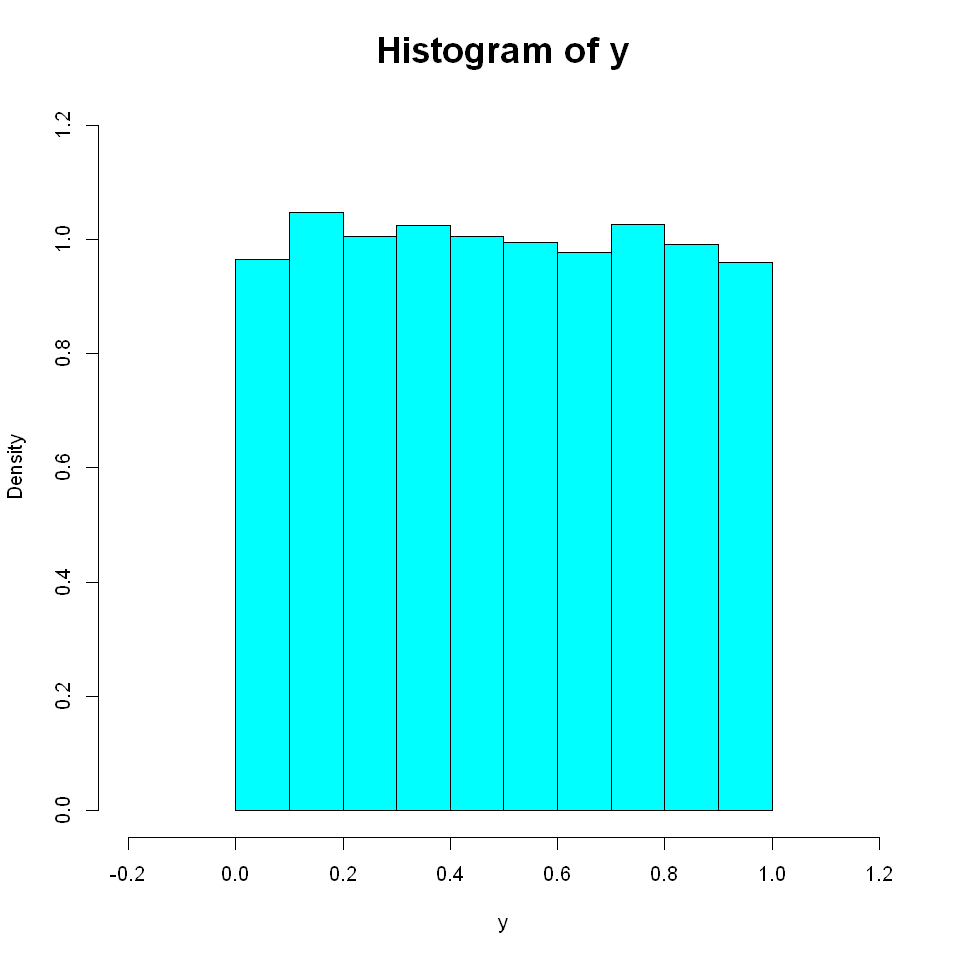

In [20]:
options(repr.plot.width=8,repr.plot.height=8)
hist(y,freq=FALSE,col="cyan",xlim=c(-0.2,1.2), ylim=c(0,1.2),cex.main=1.8)

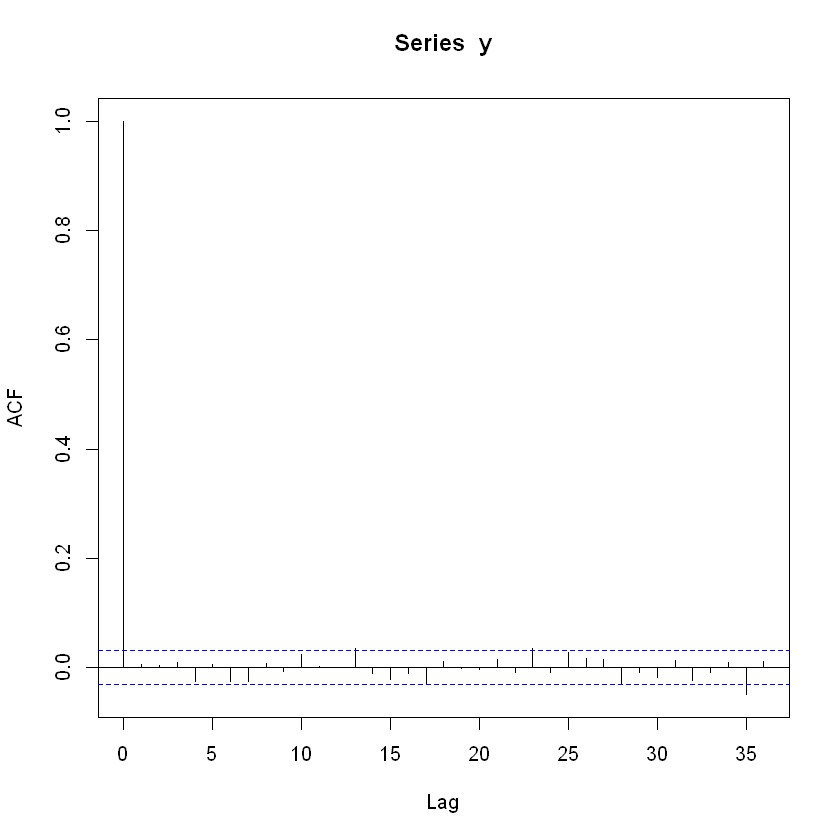

In [20]:
acf(y)

# 2. A second example: random $\gammadist(\alpha,\beta)$ numbers

$$
    \gammadist(y|\alpha,\beta) = \dfrac{\beta^{\alpha}}{\Gamma(\alpha)}\,y^{\alpha-1}\,\exp(-\beta\,y).
$$

## 01 - Write Stan code

Now the function to use is: `gamma_rng(reals alpha, reals beta)`.

$\alpha$ and $\beta$ are declared in the data block.

We will enter numerical values for $\alpha$ and $\beta$ at runtime

In [21]:
Gamma_modelString <- "
    //functions {}
    data{
        real<lower=0> alpha;
        real<lower=0> beta;
        }
    transformed data {}
    parameters{}
    transformed parameters {}
    model{ }
    generated quantities{
        real y=gamma_rng(alpha,beta);
        }
"

## 02 - Compile to DSO

In [22]:
Gamma_stanDso <- stan_model( model_code=Gamma_modelString ) 
str(Gamma_stanDso)

Formal class 'stanmodel' [package "rstan"] with 5 slots
  ..@ model_name  : chr "anon_model"
  ..@ model_code  : chr "    //functions {}\n    data{\n        real<lower=0> alpha;\n        real<lower=0> beta;\n        }\n    transf"| __truncated__
  .. ..- attr(*, "model_name2")= chr "96da8e9d8a26eb07c9caaf8839d531ac"
  ..@ model_cpp   :List of 2
  .. ..$ model_cppname: chr "model1de066df2571_"
  .. ..$ model_cppcode: chr "#ifndef MODELS_HPP\n#define MODELS_HPP\n#define STAN__SERVICES__COMMAND_HPP\n#include <rstan/rstaninc.hpp>\n#if"| __truncated__
  ..@ mk_cppmodule:function (object)  
  ..@ dso         :Formal class 'cxxdso' [package "rstan"] with 7 slots
  .. .. ..@ sig         :List of 1
  .. .. .. ..$ file1de07c27653: chr(0) 
  .. .. ..@ dso_saved   : logi TRUE
  .. .. ..@ dso_filename: chr "file1de07c27653"
  .. .. ..@ modulename  : chr "stan_fit4model1de066df2571__mod"
  .. .. ..@ system      : chr "x86_64, mingw32"
  .. .. ..@ cxxflags    : chr "CXXFLAGS = -O2 -Wall $(DEBUGFLAG) 

## 03 - Specify runtime quantities and execute the code

For this model, the sampler must be configured to use the `"fixed-parameters"` setting because there are no parameters. 

Without parameter sampling there is no need for adaptation and the number of warmup iterations should be set to zero    
(See section 15.3. _Sampling without parameters_ in the Reference manual).

In [23]:
# Specify data:
a <-2
b <-4
Gamma_dataList <- list("alpha" = a, "beta" = b)

In [24]:
# Generate posterior sample:
Gamma_stanFit <- sampling( object=Gamma_stanDso, 
                     data = Gamma_dataList, algorithm="Fixed_param",
                     chains = 1, seed = 24056, iter = 10000, warmup = 0, thin = 1)


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: Iteration:    1 / 10000 [  0%]  (Sampling)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0 seconds (Warm-up)
Chain 1:                0.01 seconds (Sampling)
Chain 1:                0.01 seconds (Total)
Chain 1: 


## 04 - Extract random numbers

In [25]:
y<-extract(Gamma_stanFit,par="y")$y
# Discard the unneeded attribute
attr(y,"dimnames")<-NULL
str(y)

 num [1:10000(1d)] 0.477 1.097 0.141 1.046 0.159 ...


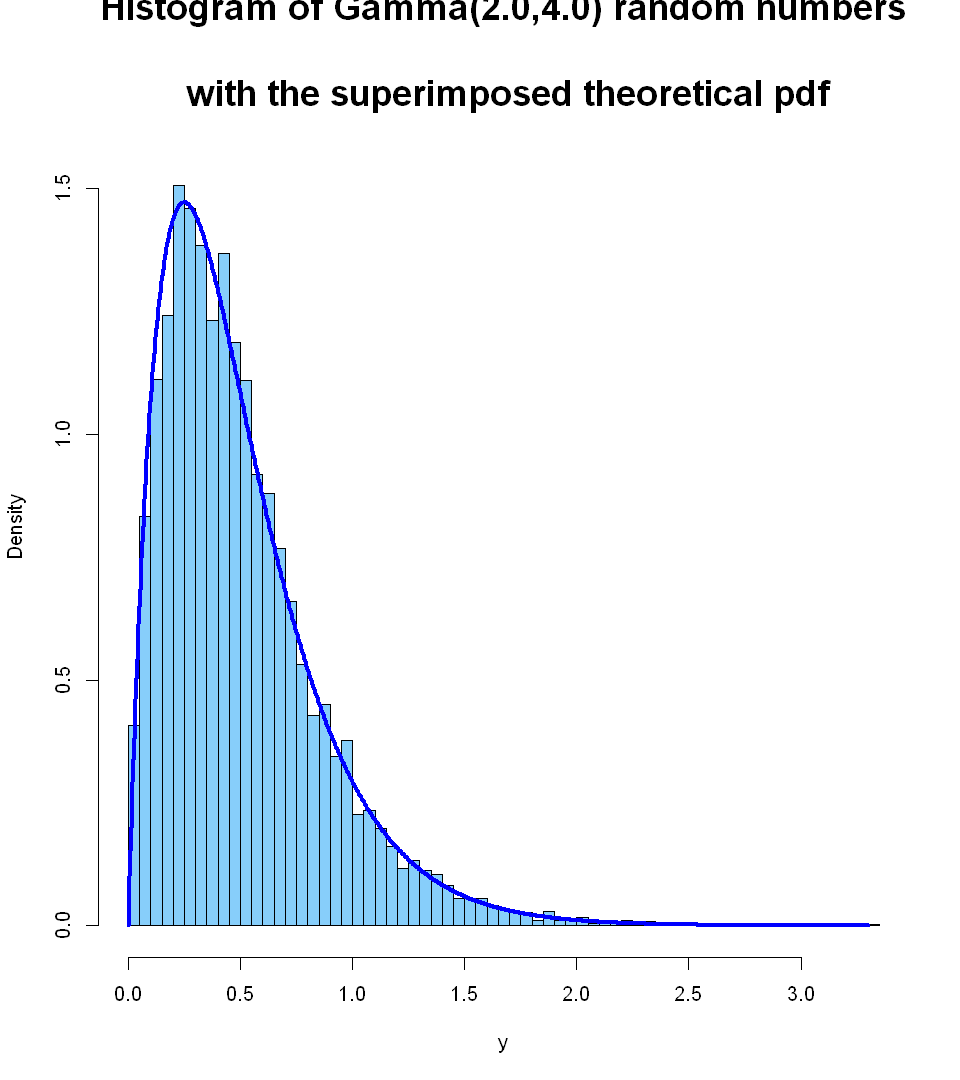

In [27]:
y.max<-max(y)
u<-seq(0,y.max,length=1000)
df.theor<-dgamma(u,shape=a,rate=b)
f.max<-max(df.theor)
options(repr.plot.width=8,repr.plot.height=9)
hist(y,freq=FALSE,col="LightSkyBlue",ylim=c(0,f.max*1.1),main=sprintf("Histogram of Gamma(%2.1f,%2.1f) random numbers
    \n with the superimposed theoretical pdf",a,b),nclass=50,cex.main=1.8)
lines(u,df.theor,lwd=3.5,col="blue")